In [1]:
%load_ext autoreload
%autoreload 2

# import data

In [2]:
from emissions.data import load_data, clean_data, split
df = load_data()
df = clean_data(df)
df.head()

----------------start loading data----------------
Data loaded: 187503 records
----------------start cleaning data----------------

Records in input data: 187503

Share of Pass and Fail before cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10813
Unique vehicles in Pass: 84908

Records with missing GVWR: 8125

Records after droping rows where GVWR is < 1000 or missing: 179373

Records after keeping only the earliest test within a month for each vehicle: 165732

Records where ODOMETER = 0: 796

Records after droping rows where ODOMETER is missing: 164855

Records after droping rows where MILE_YEAR > 40,000: 163891

Records in output data:163891

Share of Pass and Fail after cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10194
Unique vehicles in Pass: 78573
['VEHICLE_TYPE' 'MODEL_YEAR' 'VEHICLE_AGE' 'MILE_YEAR' 'GVWR'
 'ENGINE_SIZE' 'TRANS_TYPE' 'TEST_TYPE' 'RESULT' 'MAKE'
 'ENGINE_WEIGHT_RATIO' 'SPORT' 'TEST_SDATE']


,VEHICLE_TYPE,MODEL_YEAR,VEHICLE_AGE,MILE_YEAR,GVWR,ENGINE_SIZE,TRANS_TYPE,TEST_TYPE,RESULT,MAKE,ENGINE_WEIGHT_RATIO,SPORT,TEST_SDATE
0,3,2011,4,3637.25,6700.0,3700,A,I,0,dodge,0.55,0,2013-01-02 07:46:00
1,1,2002,13,12142.85,3125.0,2000,A,I,0,acura,0.64,0,2013-01-02 08:58:00
2,1,2001,14,12862.07,3875.0,2300,A,I,1,saab,0.59,0,2013-01-02 09:09:00
3,1,1996,19,7041.84,3625.0,3000,A,I,0,mercury,0.83,0,2013-01-02 09:10:00
4,1,2008,7,16336.71,2750.0,1600,A,I,0,chevrolet,0.58,0,2013-01-02 09:15:00


# Train test split

In [3]:
X_train, X_test, y_train, y_test = split(df)

----------------data splitted into train test----------------
Share of Pass and Fail in train set:
Pass: 7%
Fail: 93%
Share of Pass and Fail in test set:
Pass: 7%
Fail: 93%


# check the features first

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:
df = X_train.copy()
df['RESULT'] = y_train

from emissions.transformer import MakeTransformer
mt = MakeTransformer()
df = mt.fit_transform(df)
df.head()


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars


,VEHICLE_TYPE,MODEL_YEAR,VEHICLE_AGE,MILE_YEAR,GVWR,ENGINE_SIZE,TRANS_TYPE,TEST_TYPE,MAKE,ENGINE_WEIGHT_RATIO,SPORT,TEST_SDATE,RESULT
117749,1,2005,15,6528.80,2750.0,1800,A,I,toyota,0.65,0,2018-11-09 14:44:39,0
132007,4,2016,5,23601.60,6180.0,3500,A,I,ford,0.57,0,2019-06-26 23:05:35,0
81705,1,2005,14,8469.64,3750.0,3200,M,I,bmw,0.85,0,2017-02-22 09:50:00,0
140292,4,2019,2,2927.00,5050.0,2400,A,I,jeep,0.48,0,2019-11-08 10:34:47,0
161073,4,2004,18,4657.28,4450.0,2400,A,I,jeep,0.54,0,2020-10-31 10:45:31,0


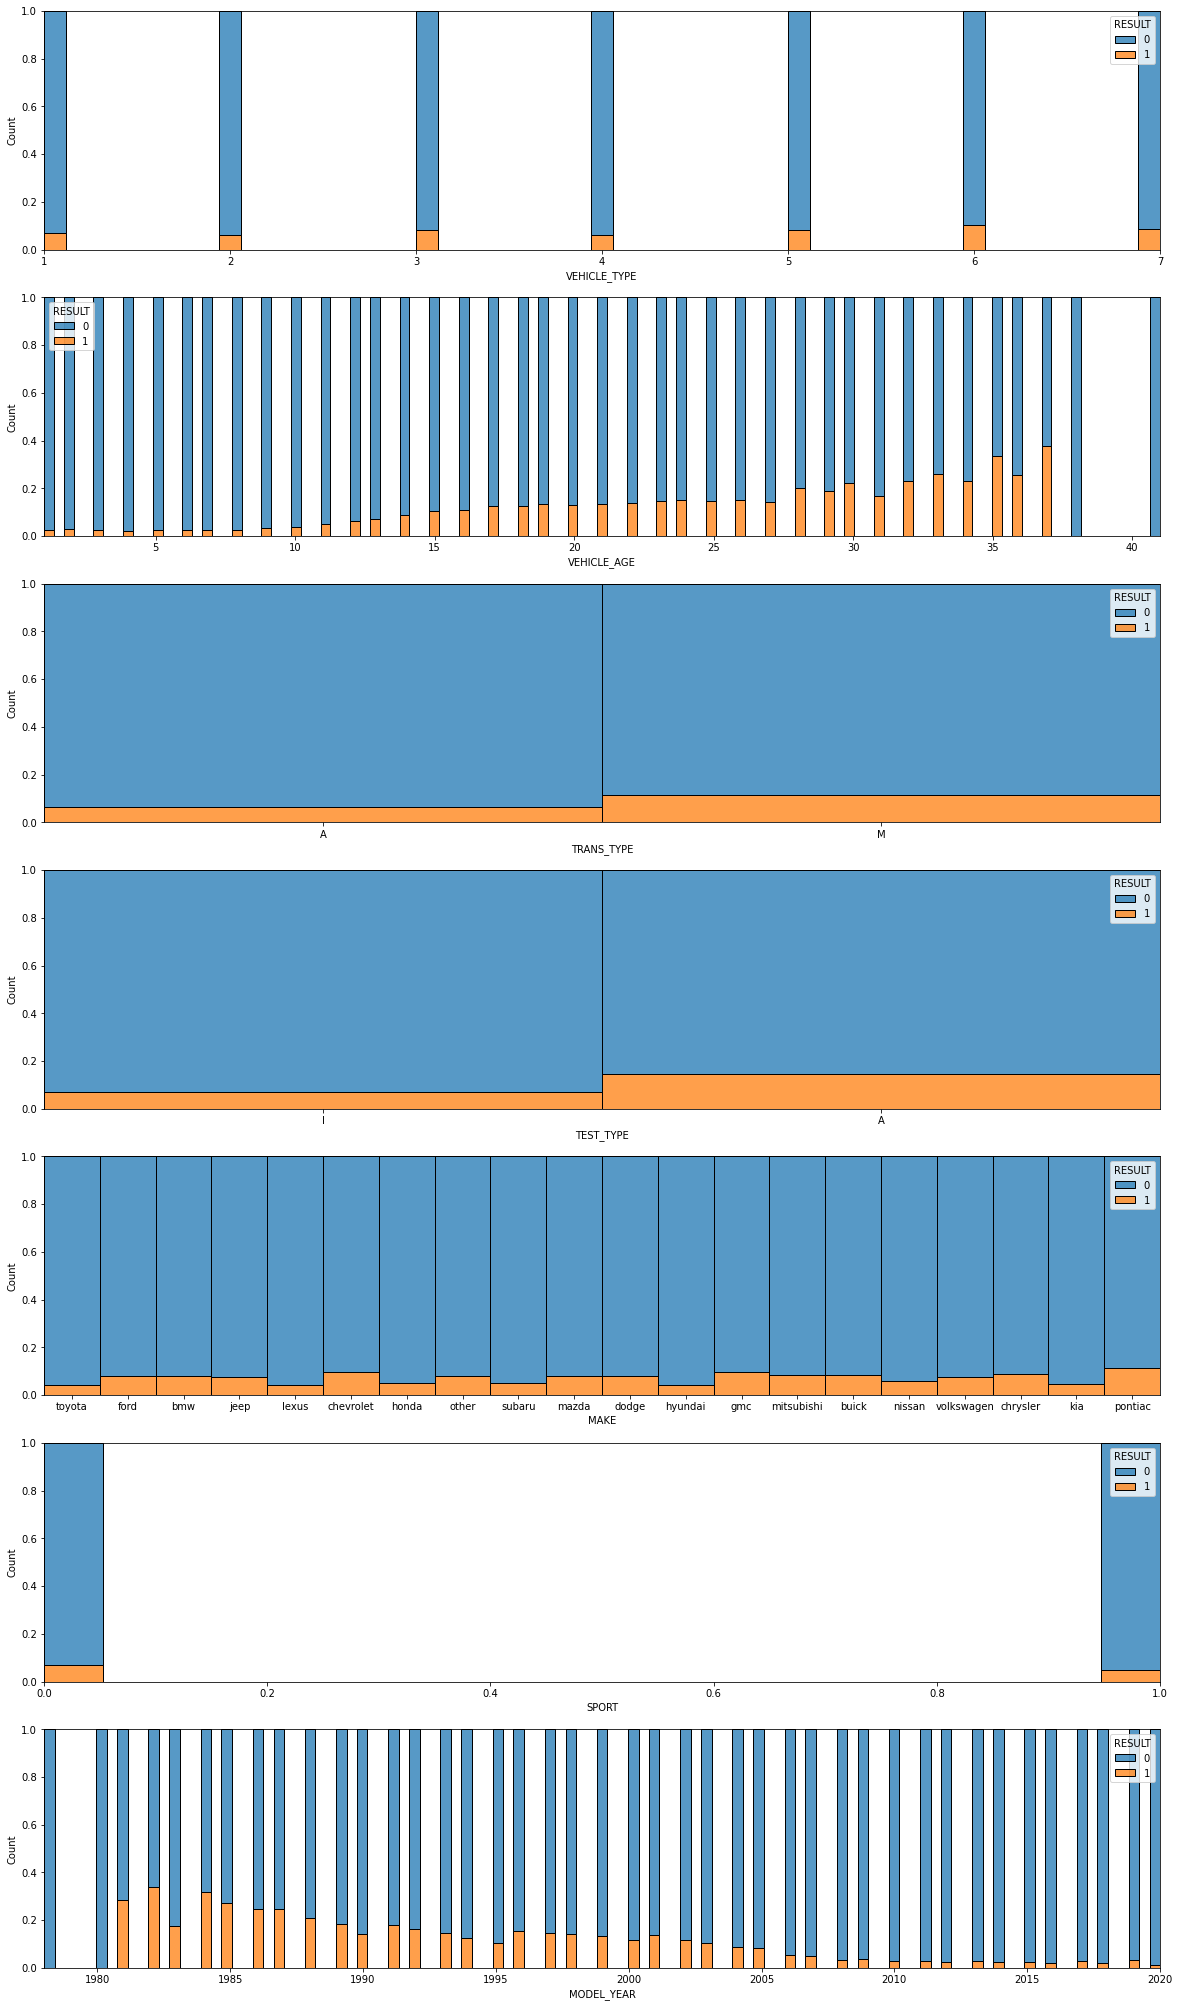

In [15]:
cols = ['VEHICLE_TYPE', 'VEHICLE_AGE', 'TRANS_TYPE', 'TEST_TYPE', 'MAKE', 'SPORT', 'MODEL_YEAR']
fig, axs = plt.subplots(7, 1, figsize=(20, 36))
for col, ax in zip(cols, axs.flat):
    sns.histplot(data=df, x=col, hue='RESULT', multiple='fill', ax=ax)

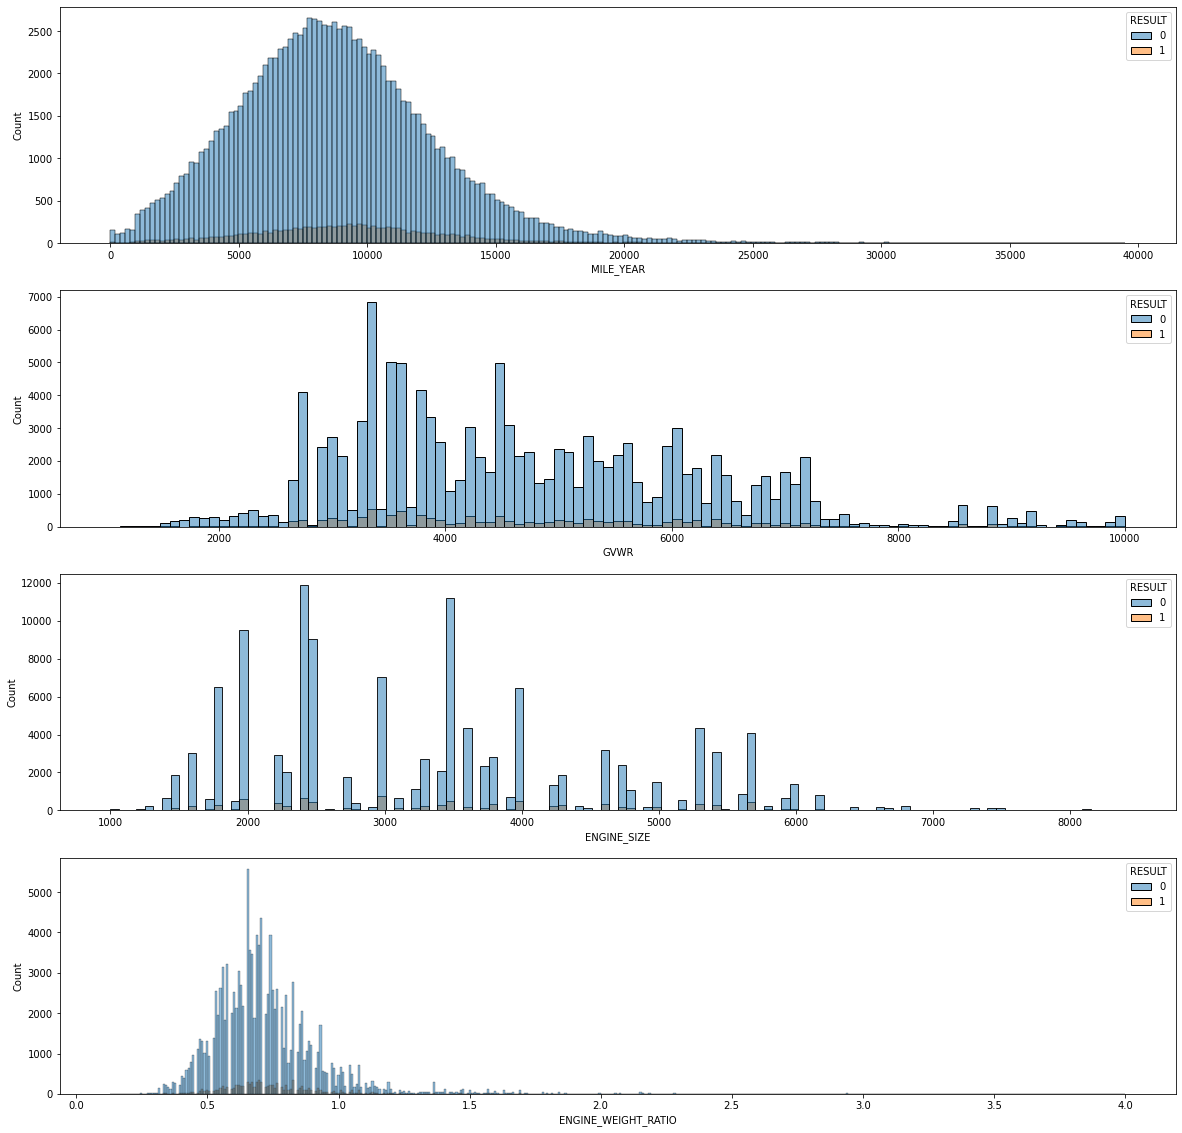

In [16]:
# numerical columns
cols = ['MILE_YEAR', 'GVWR', 'ENGINE_SIZE', 'ENGINE_WEIGHT_RATIO']
fig, axs = plt.subplots(4, 1, figsize=(20, 20))
for col, ax in zip(cols, axs.flat):
    sns.histplot(data=df, x=col, hue='RESULT', ax=ax)

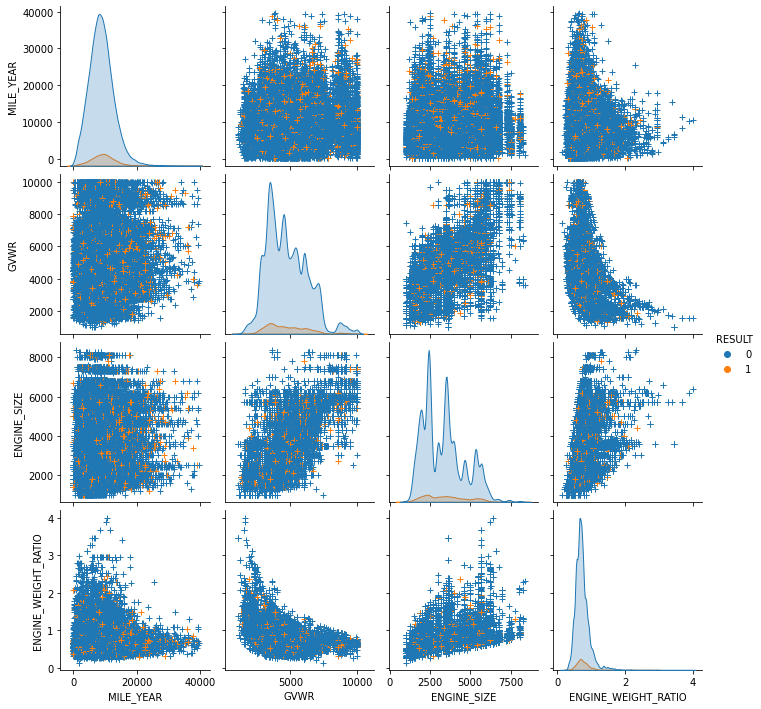

In [17]:
# numerical columns
cols = ['MILE_YEAR', 'GVWR', 'ENGINE_SIZE', 'ENGINE_WEIGHT_RATIO', 'RESULT']
sns.pairplot(data=df[cols], 
             hue='RESULT',
             plot_kws=dict(marker="+", linewidth=1, edgecolor=None));

# Baseline model 1:  all vehicles with age > 16 will fail the test
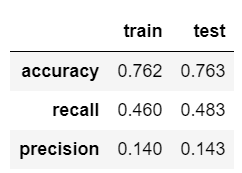


In [18]:
df.groupby('RESULT').VEHICLE_AGE.describe()

,count,mean,std,min,25%,50%,75%,max
RESULT,,,,,,,,
0,121848.0,11.889198,6.155196,1.0,7.0,11.0,16.0,41.0
1,9264.0,16.280332,6.429624,1.0,12.0,16.0,20.0,37.0


In [19]:
# train
train = {}
y_pred = (X_train.VEHICLE_AGE > 16).astype('int')
y_true = y_train
train['accuracy'] = round(accuracy_score(y_true, y_pred), 3)
train['recall'] = round(recall_score(y_true, y_pred), 3)
train['precision'] = round(precision_score(y_true, y_pred), 3)

# test
test = {}
y_pred = (X_test.VEHICLE_AGE > 16).astype('int')
y_true = y_test
test['accuracy'] = round(accuracy_score(y_true, y_pred), 3)
test['recall'] = round(recall_score(y_true, y_pred), 3)
test['precision'] = round(precision_score(y_true, y_pred), 3)

pd.DataFrame({'train':train, 'test':test})

,train,test
accuracy,0.762,0.763
recall,0.460,0.483
precision,0.140,0.143


# Baseline model 2: VEHICLE_AGE + MILE_YEAR 🚀🚀
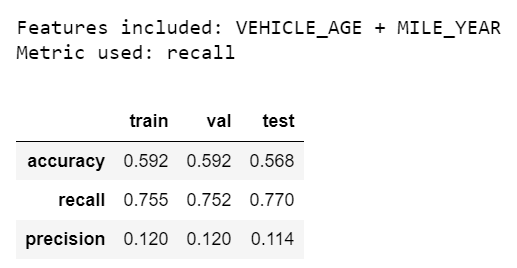
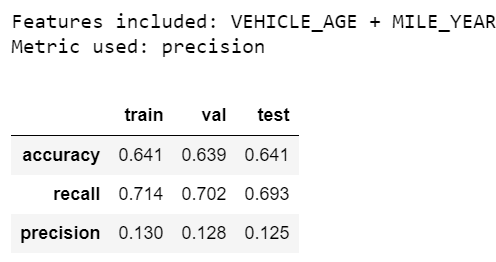


In [10]:
from emissions.trainer import Trainer
import numpy as np
import pandas as pd

cols = ['VEHICLE_AGE', 'MILE_YEAR']

In [11]:
# favoring recall
trainer1 = Trainer(X_train[cols], 
                   y_train, 
                   metric='recall', 
                   with_categorical=False,
                   max_depth=np.arange(2, 10, 1)
            )
trainer1.grid_search()
tmp1 = trainer1.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer1.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_recall', 
                      'mean_train_recall']].sort_values('mean_test_recall', ascending=False).head(4)
t.round(3)

,param_model__max_depth,mean_test_recall,mean_train_recall
2,4,0.752,0.755
0,2,0.746,0.748
3,5,0.719,0.723
5,7,0.716,0.737


In [12]:
# favoring precision
trainer2 = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=False,
                   max_depth=np.arange(2, 10, 1)
            )
trainer2.grid_search()
tmp2 = trainer2.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer2.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
t.round(3)

,param_model__max_depth,mean_test_precision,mean_train_precision
4,6,0.128,0.130
3,5,0.126,0.127
6,8,0.126,0.130
1,3,0.125,0.127



Features included: VEHICLE_AGE + MILE_YEAR
Metric used: recall


,train,val,test
accuracy,0.592,0.592,0.568
recall,0.755,0.752,0.770
precision,0.120,0.120,0.114


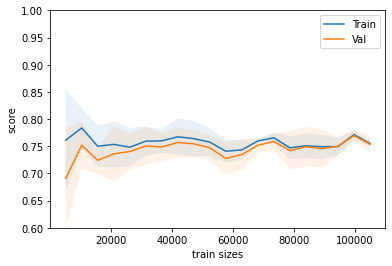

In [13]:
trainer1.learning_curve()
tmp1


Features included: VEHICLE_AGE + MILE_YEAR
Metric used: precision


,train,val,test
accuracy,0.641,0.639,0.641
recall,0.714,0.702,0.693
precision,0.130,0.128,0.125


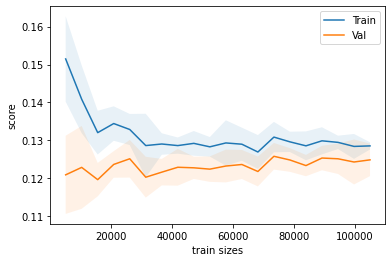

In [14]:
trainer2.learning_curve()
tmp2

# Top two features for baseline model
VEHICLE_AGE + MILE_YEAR gives highest precision

## Tree_1.0: see baseline model 2

## Tree_1.1: VEHICLE_AGE + MAKE
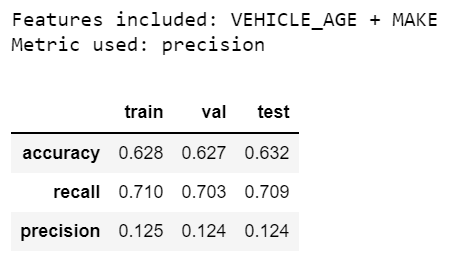


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars

   param_model__max_depth  mean_test_precision  mean_train_precision
4                      6                0.124                 0.125
5                      7                0.124                 0.125
3                      5                0.124                 0.124
7                      9                0.123                 0.125

Features included: VEHICLE_AGE + MAKE
Metric used: precision


,train,val,test
accuracy,0.628,0.627,0.632
recall,0.710,0.703,0.709
precision,0.125,0.124,0.124


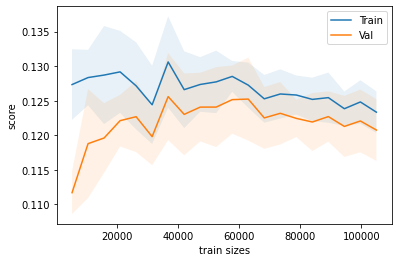

In [15]:
cols = ['VEHICLE_AGE', 'MAKE']

# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()
tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
print('\n', t.round(3))

# evaluate
trainer.learning_curve()
tmp

## Tree_1.2: VEHICLE_AGE + TRANS_TYPE
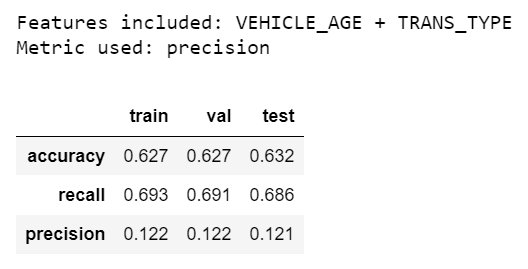



   param_model__max_depth  mean_test_precision  mean_train_precision
1                      3                0.122                 0.122
2                      4                0.121                 0.121
5                      7                0.120                 0.121
6                      8                0.120                 0.121

Features included: VEHICLE_AGE + TRANS_TYPE
Metric used: precision


,train,val,test
accuracy,0.627,0.627,0.632
recall,0.693,0.691,0.686
precision,0.122,0.122,0.121


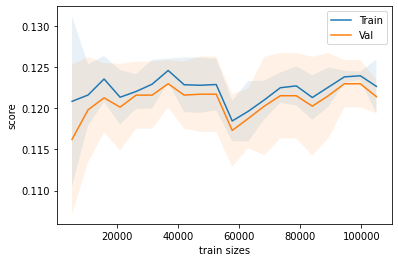

In [16]:
cols = ['VEHICLE_AGE', 'TRANS_TYPE']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['TRANS_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()
tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
print('\n', t.round(3))

trainer.learning_curve()
tmp

## Tree 1.3: VEHICLE_AGE + VEHICLE_TYPE
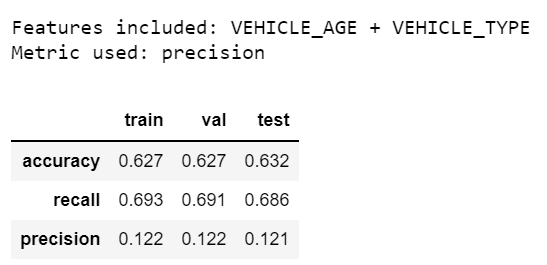



   param_model__max_depth  mean_test_precision  mean_train_precision
1                      3                0.122                 0.122
3                      5                0.121                 0.121
4                      6                0.120                 0.121
2                      4                0.120                 0.121

Features included: VEHICLE_AGE + VEHICLE_TYPE
Metric used: precision


,train,val,test
accuracy,0.627,0.627,0.632
recall,0.693,0.691,0.686
precision,0.122,0.122,0.121


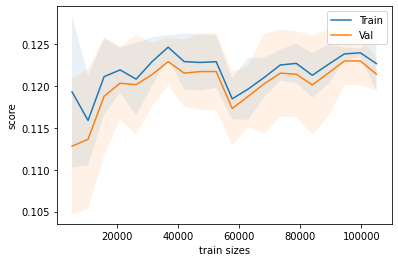

In [17]:
cols = ['VEHICLE_AGE', 'VEHICLE_TYPE']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['VEHICLE_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()
tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
print('\n', t.round(3))

trainer.learning_curve()
tmp

## Tree 1.4: VEHICLE_AGE + ENGINE_WEIGHT_RATIO
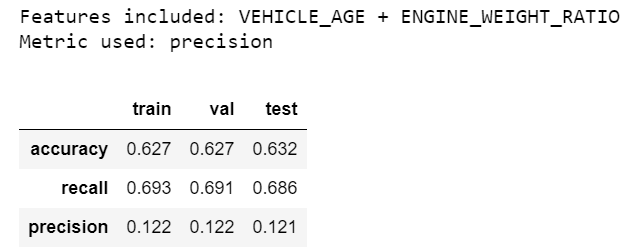



   param_model__max_depth  mean_test_precision  mean_train_precision
1                      3                0.122                 0.122
2                      4                0.121                 0.121
5                      7                0.120                 0.123
3                      5                0.120                 0.121

Features included: VEHICLE_AGE + ENGINE_WEIGHT_RATIO
Metric used: precision


,train,val,test
accuracy,0.627,0.627,0.632
recall,0.693,0.691,0.686
precision,0.122,0.122,0.121


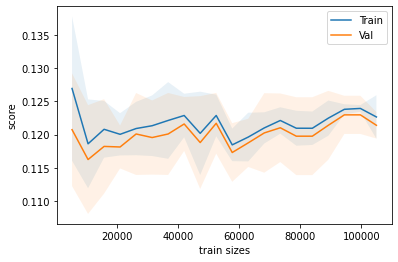

In [19]:
cols = ['VEHICLE_AGE', 'ENGINE_WEIGHT_RATIO']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=False,
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()
tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
print('\n', t.round(3))

trainer.learning_curve()
tmp

## Tree 1.5: VEHICLE_AGE + ENGINE_SIZE
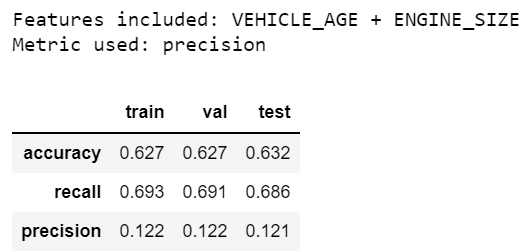



   param_model__max_depth  mean_test_precision  mean_train_precision
1                      3                0.122                 0.122
2                      4                0.121                 0.121
4                      6                0.120                 0.122
3                      5                0.120                 0.121

Features included: VEHICLE_AGE + ENGINE_SIZE
Metric used: precision


,train,val,test
accuracy,0.627,0.627,0.632
recall,0.693,0.691,0.686
precision,0.122,0.122,0.121


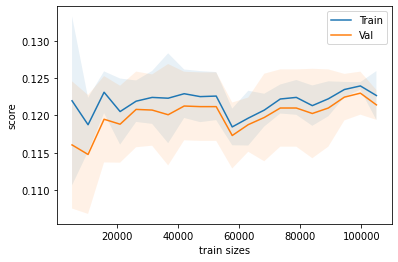

In [21]:
cols = ['VEHICLE_AGE', 'ENGINE_SIZE']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=False,
                   max_depth=np.arange(2, 20, 1)
            )
trainer.grid_search()
tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
print('\n', t.round(3))

trainer.learning_curve()
tmp

## Tree 1.6: VEHICLE_AGE + TEST_TYPE
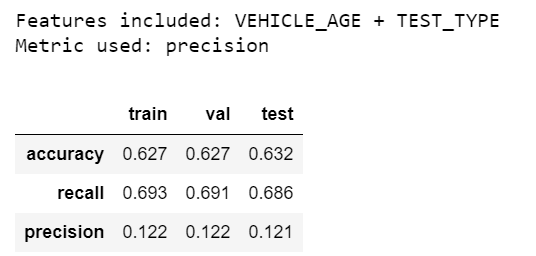



   param_model__max_depth  mean_test_precision  mean_train_precision
1                      3                0.122                 0.122
5                      7                0.122                 0.123
2                      4                0.122                 0.122
4                      6                0.122                 0.123

Features included: VEHICLE_AGE + TEST_TYPE
Metric used: precision


,train,val,test
accuracy,0.627,0.627,0.632
recall,0.693,0.691,0.686
precision,0.122,0.122,0.121


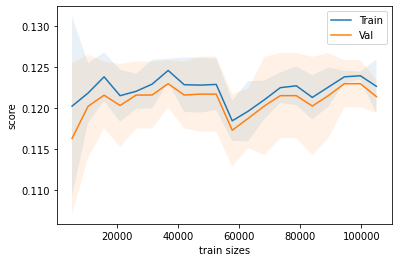

In [22]:
cols = ['VEHICLE_AGE', 'TEST_TYPE']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['TEST_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()
tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(4)
print('\n', t.round(3))

trainer.learning_curve()
tmp

# Deductive feature selection

## DT_2.0


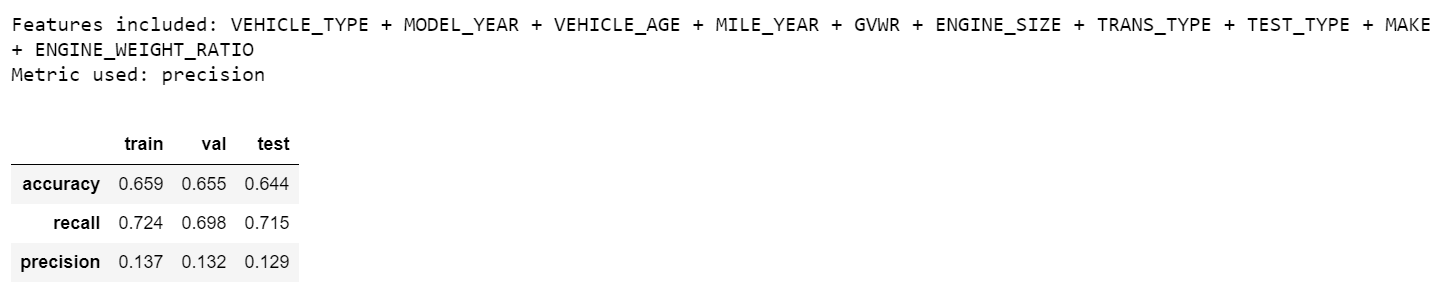


In [39]:
cols = ['VEHICLE_TYPE', 'MODEL_YEAR', 'VEHICLE_AGE', 'MILE_YEAR', 'GVWR', 'ENGINE_SIZE', 'TRANS_TYPE', 'TEST_TYPE', 'MAKE', 'ENGINE_WEIGHT_RATIO']
X_train[cols].head()

,VEHICLE_TYPE,MODEL_YEAR,VEHICLE_AGE,MILE_YEAR,GVWR,ENGINE_SIZE,TRANS_TYPE,TEST_TYPE,MAKE,ENGINE_WEIGHT_RATIO
117749,1,2005,15,6528.80,2750.0,1800,A,I,toyota,0.65
132007,4,2016,5,23601.60,6180.0,3500,A,I,ford,0.57
81705,1,2005,14,8469.64,3750.0,3200,M,I,bmw,0.85
140292,4,2019,2,2927.00,5050.0,2400,A,I,jeep,0.48
161073,4,2004,18,4657.28,4450.0,2400,A,I,jeep,0.54


In [44]:
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE', 'TEST_TYPE', 'TRANS_TYPE', 'VEHICLE_TYPE'],
                   max_depth=np.arange(2, 20, 1)
            )
trainer.grid_search()

tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(5)
print('\n', t.round(3))
tmp


    param_model__max_depth  mean_test_precision  mean_train_precision
5                       7                0.132                 0.137
6                       8                0.130                 0.137
8                      10                0.129                 0.145
7                       9                0.129                 0.140
17                     19                0.129                 0.234


,train,val,test
accuracy,0.659,0.655,0.644
recall,0.724,0.698,0.715
precision,0.137,0.132,0.129



Features included: VEHICLE_TYPE + MODEL_YEAR + VEHICLE_AGE + MILE_YEAR + GVWR + ENGINE_SIZE + TRANS_TYPE + TEST_TYPE + MAKE + ENGINE_WEIGHT_RATIO
Metric used: precision


,train,val,test
accuracy,0.659,0.655,0.644
recall,0.724,0.698,0.715
precision,0.137,0.132,0.129


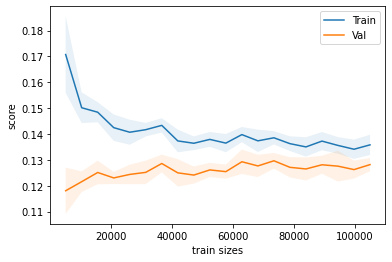

In [45]:
# evaluate
trainer.learning_curve()
tmp

## DT_2.1
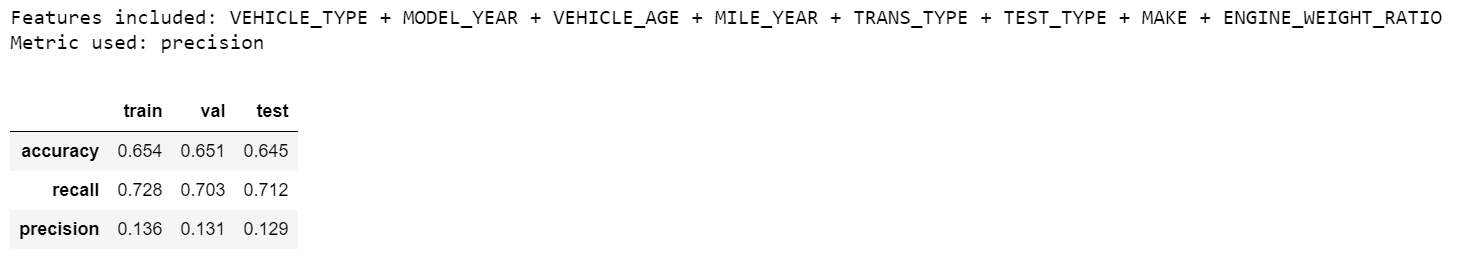


In [46]:
cols = ['VEHICLE_TYPE', 'MODEL_YEAR', 'VEHICLE_AGE', 'MILE_YEAR', 'TRANS_TYPE', 'TEST_TYPE', 'MAKE', 'ENGINE_WEIGHT_RATIO']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE', 'TEST_TYPE', 'TRANS_TYPE', 'VEHICLE_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()

tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(5)
print('\n', t.round(3))
tmp


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars

   param_model__max_depth  mean_test_precision  mean_train_precision
5                      7                0.131                 0.136
6                      8                0.129                 0.136
7                      9                0.129                 0.139
8                     10                0.128                 0.143
4                      6                0.127                 0.130


,train,val,test
accuracy,0.654,0.651,0.645
recall,0.728,0.703,0.712
precision,0.136,0.131,0.129



Features included: VEHICLE_TYPE + MODEL_YEAR + VEHICLE_AGE + MILE_YEAR + TRANS_TYPE + TEST_TYPE + MAKE + ENGINE_WEIGHT_RATIO
Metric used: precision


,train,val,test
accuracy,0.654,0.651,0.645
recall,0.728,0.703,0.712
precision,0.136,0.131,0.129


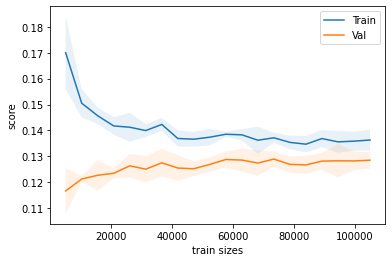

In [48]:
trainer.learning_curve()
tmp

## DT_2.2
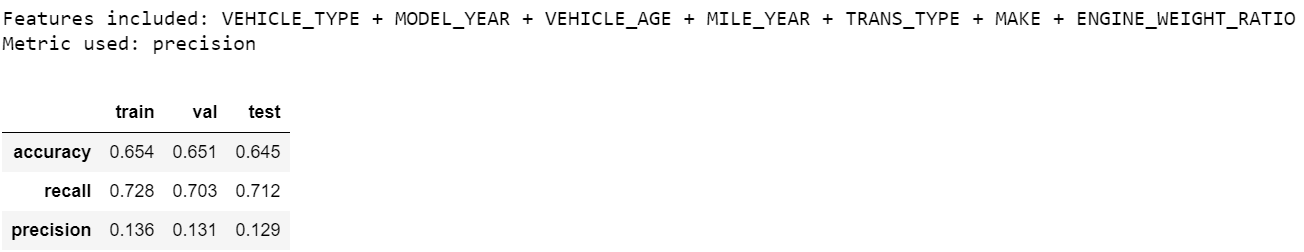


In [50]:
cols = ['VEHICLE_TYPE', 'MODEL_YEAR', 'VEHICLE_AGE', 'MILE_YEAR', 'TRANS_TYPE', 'MAKE', 'ENGINE_WEIGHT_RATIO']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE', 'TRANS_TYPE', 'VEHICLE_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()

tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(5)
print('\n', t.round(3))
tmp


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars

   param_model__max_depth  mean_test_precision  mean_train_precision
5                      7                0.131                 0.136
6                      8                0.129                 0.136
7                      9                0.129                 0.139
8                     10                0.128                 0.143
4                      6                0.127                 0.130


,train,val,test
accuracy,0.654,0.651,0.645
recall,0.728,0.703,0.712
precision,0.136,0.131,0.129



Features included: VEHICLE_TYPE + MODEL_YEAR + VEHICLE_AGE + MILE_YEAR + TRANS_TYPE + MAKE + ENGINE_WEIGHT_RATIO
Metric used: precision


,train,val,test
accuracy,0.654,0.651,0.645
recall,0.728,0.703,0.712
precision,0.136,0.131,0.129


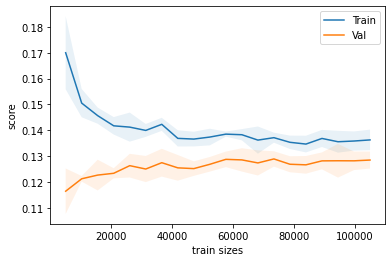

In [51]:
trainer.learning_curve()
tmp

## DT_2.3
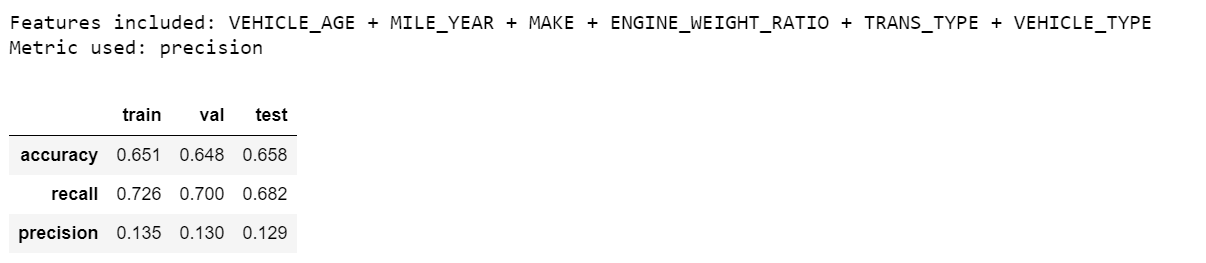


In [54]:
cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'ENGINE_WEIGHT_RATIO', 'TRANS_TYPE', 'VEHICLE_TYPE']

# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE', 'TRANS_TYPE', 'VEHICLE_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()

tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(5)
print('\n', t.round(3))
tmp


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars

   param_model__max_depth  mean_test_precision  mean_train_precision
5                      7                0.130                 0.135
6                      8                0.129                 0.136
4                      6                0.128                 0.131
7                      9                0.127                 0.137
1                      3                0.125                 0.127


,train,val,test
accuracy,0.651,0.648,0.658
recall,0.726,0.700,0.682
precision,0.135,0.130,0.129



Features included: VEHICLE_AGE + MILE_YEAR + MAKE + ENGINE_WEIGHT_RATIO + TRANS_TYPE + VEHICLE_TYPE
Metric used: precision


,train,val,test
accuracy,0.651,0.648,0.658
recall,0.726,0.700,0.682
precision,0.135,0.130,0.129


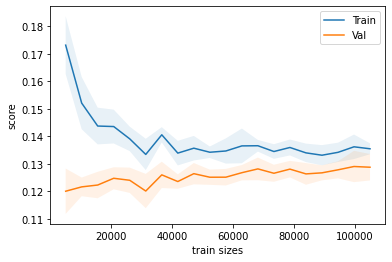

In [55]:
trainer.learning_curve()
tmp

## DT_2.4
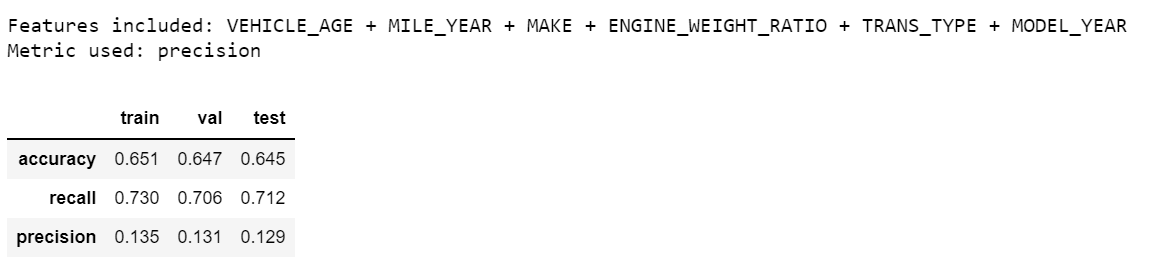


In [56]:
cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'ENGINE_WEIGHT_RATIO', 'TRANS_TYPE', 'MODEL_YEAR']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE', 'TRANS_TYPE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()

tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(5)
print('\n', t.round(3))
tmp


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars

   param_model__max_depth  mean_test_precision  mean_train_precision
5                      7                0.131                 0.135
6                      8                0.129                 0.136
7                      9                0.128                 0.138
4                      6                0.127                 0.130
1                      3                0.125                 0.126


,train,val,test
accuracy,0.651,0.647,0.645
recall,0.730,0.706,0.712
precision,0.135,0.131,0.129



Features included: VEHICLE_AGE + MILE_YEAR + MAKE + ENGINE_WEIGHT_RATIO + TRANS_TYPE + MODEL_YEAR
Metric used: precision


,train,val,test
accuracy,0.651,0.647,0.645
recall,0.730,0.706,0.712
precision,0.135,0.131,0.129


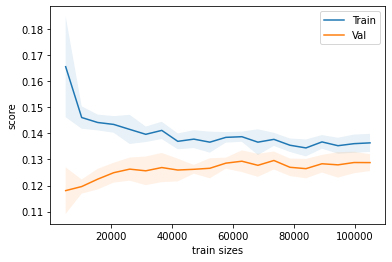

In [57]:
trainer.learning_curve()
tmp

## DT_2.5

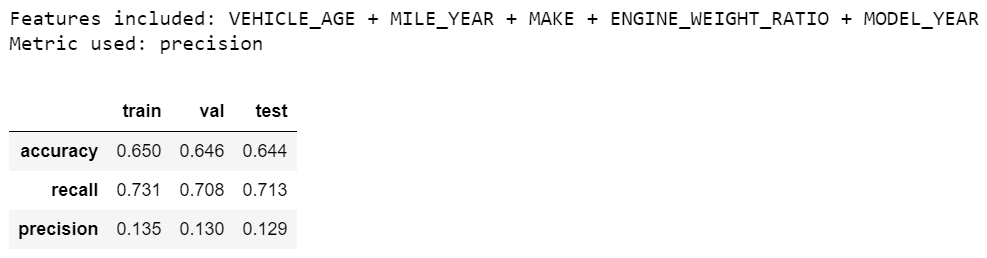

In [58]:
cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'ENGINE_WEIGHT_RATIO', 'MODEL_YEAR']
# favoring precision
trainer = Trainer(X_train[cols], 
                   y_train, 
                   metric='precision', 
                   with_categorical=['MAKE'],
                   max_depth=np.arange(2, 10, 1)
            )
trainer.grid_search()

tmp = trainer.evaluate(X_test[cols], y_test)

# have a look at best params
result = trainer.search_result.cv_results_
t = pd.DataFrame(result)[['param_model__max_depth', 
                      'mean_test_precision', 
                      'mean_train_precision']].sort_values('mean_test_precision', ascending=False).head(5)
print('\n', t.round(3))
tmp


57 make labels each account for less than 1.0% of cars and together account for 9.98% of cars

   param_model__max_depth  mean_test_precision  mean_train_precision
5                      7                0.130                 0.135
6                      8                0.129                 0.136
7                      9                0.129                 0.138
4                      6                0.127                 0.130
1                      3                0.125                 0.126


,train,val,test
accuracy,0.650,0.646,0.644
recall,0.731,0.708,0.713
precision,0.135,0.130,0.129



Features included: VEHICLE_AGE + MILE_YEAR + MAKE + ENGINE_WEIGHT_RATIO + MODEL_YEAR
Metric used: precision


,train,val,test
accuracy,0.650,0.646,0.644
recall,0.731,0.708,0.713
precision,0.135,0.130,0.129


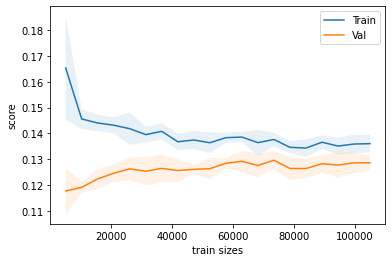

In [59]:
trainer.learning_curve()
tmp

# Summary

- Primary features: *VEHICLE_AGE, MILE_YEAR, MAKE, MODEL_YEAR, ENGINE_WEIGHT_RATIO*
- Features not contributing much: *TEST_TYPE, TRANS_TYPE, VEHICLE_TYPE*

# Forest